In [1]:
cd ..

/kaggle


In [2]:
cd input/chest-xray-pneumonia/chest_xray/

/kaggle/input/chest-xray-pneumonia/chest_xray


In [3]:
train_dir = "train/"
val_dir = "test/"
test_dir = "val/"

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(rescale = 1.0/255.)
val_datagen = ImageDataGenerator(rescale = 1./255.)

In [58]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150,150), class_mode = "binary", batch_size=32)
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(150,150), class_mode = "binary", batch_size = 16)
test_generator = val_datagen.flow_from_directory(test_dir, target_size=(150,150))

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [68]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(256, (3,3),input_shape = (150,150,3), activation='relu', kernel_regularizer = tf.keras.regularizers.l2()),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128, (3,3),activation = "relu", kernel_regularizer = tf.keras.regularizers.l2()),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64,(3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),

    
    tf.keras.layers.Conv2D(64,(3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),

    
    tf.keras.layers.Conv2D(32,(3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, "sigmoid")
])

In [69]:
optimizer = tf.keras.optimizers.SGD(lr = 1e-4, momentum=0.99)

In [70]:
model.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics = ['acc'])

In [71]:
history = model.fit(train_generator, validation_data=val_generator, epochs = 10, verbose = 1)

Train for 163 steps, validate for 39 steps
Epoch 1/10
163/163 [==============================] - 140s 859ms/step - loss: 2.3794 - acc: 0.6421 - val_loss: 2.3754 - val_acc: 0.6250
Epoch 2/10
163/163 [==============================] - 139s 852ms/step - loss: 2.2325 - acc: 0.7429 - val_loss: 2.2762 - val_acc: 0.6250
Epoch 3/10
163/163 [==============================] - 140s 862ms/step - loss: 2.1248 - acc: 0.7429 - val_loss: 2.1716 - val_acc: 0.6250
Epoch 4/10
163/163 [==============================] - 140s 858ms/step - loss: 2.0235 - acc: 0.7429 - val_loss: 2.0735 - val_acc: 0.6250
Epoch 5/10
163/163 [==============================] - 140s 859ms/step - loss: 1.9274 - acc: 0.7429 - val_loss: 1.9800 - val_acc: 0.6250
Epoch 6/10
163/163 [==============================] - 140s 862ms/step - loss: 1.8355 - acc: 0.7429 - val_loss: 1.8932 - val_acc: 0.6250
Epoch 7/10
163/163 [==============================] - 139s 854ms/step - loss: 1.7461 - acc: 0.7429 - val_loss: 1.8008 - val_acc: 0.6250
Epoch

In [75]:
history = model.fit(train_generator, validation_data=val_generator, epochs = 5, verbose = 1)

Train for 163 steps, validate for 39 steps
Epoch 1/5
163/163 [==============================] - 139s 851ms/step - loss: 1.3135 - acc: 0.8206 - val_loss: 1.3418 - val_acc: 0.7933
Epoch 2/5
163/163 [==============================] - 139s 850ms/step - loss: 1.2013 - acc: 0.8445 - val_loss: 1.2355 - val_acc: 0.8237
Epoch 3/5
163/163 [==============================] - 139s 855ms/step - loss: 1.1071 - acc: 0.8725 - val_loss: 1.1654 - val_acc: 0.8269
Epoch 4/5
163/163 [==============================] - 139s 854ms/step - loss: 1.0507 - acc: 0.8785 - val_loss: 1.1250 - val_acc: 0.8189
Epoch 5/5
163/163 [==============================] - 139s 852ms/step - loss: 0.9758 - acc: 0.8901 - val_loss: 1.0603 - val_acc: 0.8205


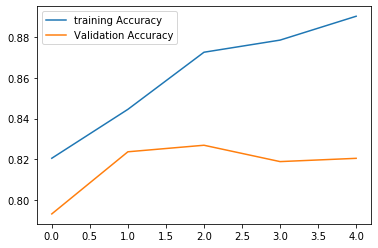

In [76]:
plt.plot(history.history['acc'], label = "training Accuracy")
plt.plot(history.history['val_acc'], label = "Validation Accuracy")
plt.legend()

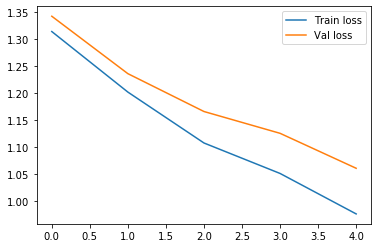

In [77]:
plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Val loss")
plt.legend()

## Tuning optimizer 

In [78]:
optimizer1 = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.99)

In [79]:
model.compile(optimizer = optimizer1, loss = "binary_crossentropy", metrics = ['acc'])

In [80]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-8 * 10**(epochs*0.6))

In [81]:
history = model.fit(train_generator, validation_data=val_generator, epochs = 10, callbacks=[lr_schedule], verbose = 1, steps_per_epoch=75)

Train for 75 steps, validate for 39 steps
Epoch 1/10
75/75 [==============================] - 73s 980ms/step - loss: 0.9568 - acc: 0.8896 - val_loss: 1.0603 - val_acc: 0.8205
Epoch 2/10
75/75 [==============================] - 73s 974ms/step - loss: 0.9467 - acc: 0.8883 - val_loss: 1.0603 - val_acc: 0.8205
Epoch 3/10
75/75 [==============================] - 72s 963ms/step - loss: 0.9409 - acc: 0.8904 - val_loss: 1.0602 - val_acc: 0.8205
Epoch 4/10
75/75 [==============================] - 71s 951ms/step - loss: 0.9356 - acc: 0.8996 - val_loss: 1.0601 - val_acc: 0.8205
Epoch 5/10
75/75 [==============================] - 72s 962ms/step - loss: 0.9497 - acc: 0.8867 - val_loss: 1.0596 - val_acc: 0.8205
Epoch 6/10
75/75 [==============================] - 73s 973ms/step - loss: 0.9507 - acc: 0.8904 - val_loss: 1.0598 - val_acc: 0.8205
Epoch 7/10
75/75 [==============================] - 71s 952ms/step - loss: 0.9373 - acc: 0.8971 - val_loss: 1.0582 - val_acc: 0.8253
Epoch 8/10
75/75 [=========

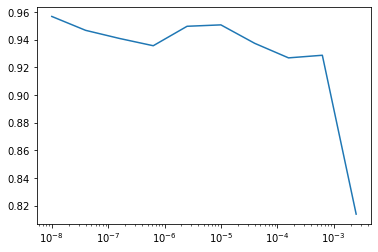

In [82]:
x = 1e-8 * 10**(np.arange(10) * 0.6)  
y = history.history['loss']
plt.semilogx(x,y)

## RMSprop 

In [83]:
optimizer2 = tf.keras.optimizers.RMSprop(learning_rate=1e-8, momentum=0.99)

In [84]:
model.compile(optimizer = optimizer1, loss = "binary_crossentropy", metrics = ['acc'])

In [85]:
history = model.fit(train_generator, validation_data=val_generator, epochs = 10, callbacks=[lr_schedule], verbose = 1, steps_per_epoch=50)

Train for 50 steps, validate for 39 steps
Epoch 1/10
50/50 [==============================] - 55s 1s/step - loss: 0.9192 - acc: 0.8662 - val_loss: 1.5540 - val_acc: 0.7740
Epoch 2/10
50/50 [==============================] - 53s 1s/step - loss: 2.5457 - acc: 0.8225 - val_loss: 3.6266 - val_acc: 0.7196
Epoch 3/10
50/50 [==============================] - 52s 1s/step - loss: 4.1331 - acc: 0.8194 - val_loss: 5.1193 - val_acc: 0.7147
Epoch 4/10
50/50 [==============================] - 52s 1s/step - loss: 4.1985 - acc: 0.8363 - val_loss: 2.5715 - val_acc: 0.8333
Epoch 5/10
50/50 [==============================] - 54s 1s/step - loss: 3.5550 - acc: 0.8238 - val_loss: 2.1755 - val_acc: 0.8301
Epoch 6/10
50/50 [==============================] - 53s 1s/step - loss: 3.1123 - acc: 0.8244 - val_loss: 1.4014 - val_acc: 0.8125
Epoch 7/10
50/50 [==============================] - 52s 1s/step - loss: 1.3502 - acc: 0.8350 - val_loss: 0.7866 - val_acc: 0.7788
Epoch 8/10
50/50 [==============================

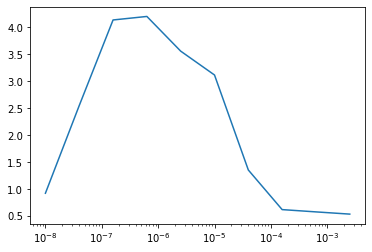

In [86]:
x = 1e-8 * 10**(np.arange(10) * 0.6)  
y = history.history['loss']
plt.semilogx(x,y)

## Adam 

In [87]:
optimizer3 = tf.keras.optimizers.Adam(lr = 0.001)

In [88]:
model.compile(optimizer = optimizer3, loss = "binary_crossentropy", metrics = ['acc'])

In [ ]:
history = model.fit(train_generator, validation_data=val_generator, epochs = 10, callbacks=[lr_schedule], verbose = 1, steps_per_epoch=50)

Train for 50 steps, validate for 39 steps
Epoch 1/10
50/50 [==============================] - 53s 1s/step - loss: 0.4522 - acc: 0.8850 - val_loss: 0.6703 - val_acc: 0.7933
Epoch 2/10
50/50 [==============================] - 52s 1s/step - loss: 0.4611 - acc: 0.8894 - val_loss: 0.6701 - val_acc: 0.7933
Epoch 3/10
50/50 [==============================] - 53s 1s/step - loss: 0.4529 - acc: 0.8956 - val_loss: 0.6692 - val_acc: 0.7933
Epoch 4/10
50/50 [==============================] - 54s 1s/step - loss: 0.4543 - acc: 0.8881 - val_loss: 0.6655 - val_acc: 0.7869
Epoch 5/10
50/50 [==============================] - 159s 3s/step - loss: 0.4581 - acc: 0.8819 - val_loss: 0.6548 - val_acc: 0.7949
Epoch 6/10
49/50 [============================>.] - ETA: 0s - loss: 0.4394 - acc: 0.8916

In [ ]:
x = 1e-8 * 10**(np.arange(10) * 0.6)  
y = history.history['loss']
plt.semilogx(x,y)

## VGG16 

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout

In [44]:
base_model = tf.keras.applications.VGG16(include_top = False, weights = 'imagenet', input_shape = (240,240,3))

58892288/58889256 [==============================] - 1s 0us/step


In [45]:
base_model.trainable = False

In [46]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [47]:
pred_layer = tf.keras.layers.Dense(1, "sigmoid")

In [48]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  pred_layer
])


In [49]:
model.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics = ['acc'])

In [51]:
history2 = model.fit(train_generator, validation_data=val_generator, epochs = 10)

Train for 163 steps, validate for 39 steps
Epoch 1/10
163/163 [==============================] - 138s 846ms/step - loss: 0.2946 - acc: 0.8905 - val_loss: 0.4733 - val_acc: 0.7276
Epoch 2/10
163/163 [==============================] - 154s 943ms/step - loss: 0.2859 - acc: 0.8955 - val_loss: 0.4517 - val_acc: 0.7644
Epoch 3/10
163/163 [==============================] - 138s 849ms/step - loss: 0.2788 - acc: 0.8949 - val_loss: 0.4449 - val_acc: 0.7788
Epoch 4/10
163/163 [==============================] - 139s 855ms/step - loss: 0.2723 - acc: 0.9009 - val_loss: 0.4592 - val_acc: 0.7516
Epoch 5/10
163/163 [==============================] - 139s 854ms/step - loss: 0.2681 - acc: 0.8986 - val_loss: 0.4532 - val_acc: 0.7596
Epoch 6/10
163/163 [==============================] - 138s 849ms/step - loss: 0.2623 - acc: 0.9041 - val_loss: 0.4398 - val_acc: 0.7821
Epoch 7/10
163/163 [==============================] - 138s 847ms/step - loss: 0.2583 - acc: 0.9066 - val_loss: 0.4211 - val_acc: 0.8109
Epoch

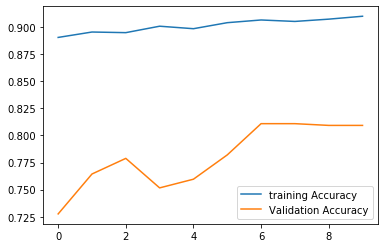

In [54]:
plt.plot(history2.history['acc'], label = "training Accuracy")
plt.plot(history2.history['val_acc'], label = "Validation Accuracy")
plt.legend()

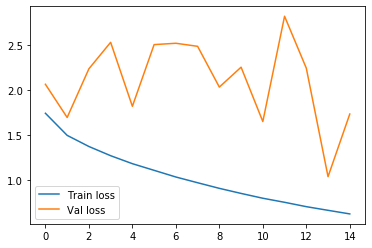

In [57]:
plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Val loss")
plt.legend()